# Using Data to Predict the Results of 2022 World Cup
#### Emma Williamson
*** 
## Introduction
### Motivation
For the past three weeks, the entire world has come together to watch 2022 World Cup and support their team. This a soccer/football tournament that occurs every four years and unites the countries of the world, as they play against eachother in one of the biggest sporting events to become the world champion. This project will focus on each countries game statistics in the games they have played in order to predict the outcome of tournament and the success of select teams.

This tutorial will teach you how to:
- Collect data from sources
- Clean and reorganize data
- Find statistics for data
- Graph and model relationships between data
- Classification model????!!!!!

#### Background
This source linked below is helpful for understanding the logistics of the 2022 World Cup. It specifically breaks down the organization of each stage in the tournament, how points are awarded, how ties are determined, how teams advance and more.  

[Answering Your Questions About the 2022 World Cup](https://www.nytimes.com/article/world-cup-qatar-faq.html)  
[FIFA World Cup](https://en.wikipedia.org/wiki/FIFA_World_Cup#:~:text=The%20final%20tournament%20format%20since,groups%20of%20four%20teams%20each.)  

Brief Summary
- Group Stage: 
    - 32 teams divided into 8 groups of 4
    - Points awarded to teams based on game outcome: 3 points for a win, 1 point for a draw, 0 for a loss
    - Top two finishers in each group go to the round of 16
    - Tied points in the end will be determined based on goals scored
- Knockout Stage:
    - 16 teams
    - Single-elimination
    - Ties determined by extra time and penalty shootouts
- Quarter-Finals
- Semi-Finals
- Third Place Match
- Final
  
### Required Libraries/Tools
The following libraries will be used throughout the tutorial and will need to be imported in order to not cause any errors.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy.stats

## Part 1: Data Collection
In this project we are getting our data from two different CSV files,  
[Team Data](https://www.kaggle.com/datasets/8bb0ea3d654f93b25524e44a65c39322f09e6aef70ea4e961838b9cd2d83fe86?resource=download&select=team_data.csv) - This data analyzes each team and many very specific game statistics over all of the games they have played in the 2022 World Cup  
[Group Stats](https://www.kaggle.com/datasets/8bb0ea3d654f93b25524e44a65c39322f09e6aef70ea4e961838b9cd2d83fe86?resource=download&select=group_stats.csv) - This data includes more general information of each teams game statistics based off of the results of the group stages in the 2022 World Cup  
[Column Descriptions](https://www.kaggle.com/datasets/8bb0ea3d654f93b25524e44a65c39322f09e6aef70ea4e961838b9cd2d83fe86?resource=download&select=team_tips.json) - This is the link to the column descriptions  
We first read in both CSV file and then display the head of each dataframe in order to visualize the data and assure it is formatted properly.

In [2]:
team_data = pd.read_csv("team_data.csv")
group_stats = pd.read_csv("group_stats.csv")

In [3]:
team_data.head()

,team,players_used,avg_age,possession,games,games_starts,minutes,minutes_90s,goals,assists,...,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct
0,Argentina,21,28.5,61.6,5,55,480,5.3,9,6,...,59,89,18,3,0,1,226,68,61,52.7
1,Australia,20,28.7,37.8,4,44,360,4.0,3,3,...,52,34,1,0,0,0,200,72,72,50.0
2,Belgium,20,30.6,57.0,3,33,270,3.0,1,1,...,30,35,3,0,1,0,132,33,28,54.1
3,Brazil,26,28.4,56.2,5,55,480,5.3,8,6,...,63,74,8,1,0,0,271,43,56,43.4
4,Cameroon,22,28.0,41.7,3,33,270,3.0,4,4,...,32,38,2,0,0,0,142,42,36,53.8


In [4]:
group_stats.head()

,Unnamed: 0,group,rank,team,matches_played,wins,draws,losses,goals_scored,goals_against,goal_difference,points,expected_goal_scored,exp_goal_conceded,exp_goal_difference,exp_goal_difference_per_90
0,0,1,1,Netherlands,3,2,1,0,5,1,4,7,2.4,2.7,-0.3,-0.11
1,1,1,2,Senegal,3,2,0,1,5,4,1,6,3.8,2.5,1.3,0.43
2,2,1,3,Ecuador,3,1,1,1,4,3,1,4,3.7,2.6,1.2,0.39
3,3,1,4,Qatar,3,0,0,3,1,7,-6,0,1.4,3.5,-2.1,-0.71
4,4,2,1,England,3,2,1,0,9,2,7,7,5.2,2.3,2.9,0.97


## Part 2: Data Processing
### Cleaning and Organizing the Data
Next we will clean and organize the data so it is easier to read and interpret.  
In the team_data data frame, there is 189 columns, much of these we will not use throughout the tutorial, so we will remove the columns that we will not use. In addition, the team_data dataframe the statistics are based off of the current number of games each team has played, while the game_stats dataframe only has statistics from the group stages. In order to be able to compare both of these dataframes, we will only include columns from team_data that are game statistic averages or percentages, or game statistics that can be converted to such. 

In [5]:
#creates a new dataframe that only has the columns stated
new_team_data = team_data[['team', 'games', 'goals_per90', 'gk_save_pct', 'gk_goals_against_per90', 'gk_shots_on_target_against', 'shots_per90', 'shots_on_target_per90', 'corner_kicks', 'blocked_shots', 'fouls', 'fouled']]
new_team_data.head()

,team,games,goals_per90,gk_save_pct,gk_goals_against_per90,gk_shots_on_target_against,shots_per90,shots_on_target_per90,corner_kicks,blocked_shots,fouls,fouled
0,Argentina,5,1.69,16.7,0.94,6,12.75,4.87,31,9,59,89
1,Australia,4,0.75,66.7,1.50,18,6.50,2.00,8,20,52,34
2,Belgium,3,0.33,81.8,0.67,11,11.67,3.00,17,8,30,35
3,Brazil,5,1.50,70.0,0.56,10,17.81,7.50,37,10,63,74
4,Cameroon,3,1.33,73.3,1.38,15,9.33,5.33,12,6,32,38


In [6]:
#the columns (gk_shots_on_target_against, corner_kicks, blocked_shots, fouls, fouled) are all game statistics that are totaled based upon the number of games a team has played
#to make these columns comparable, we will divide it by the number of games that team has played in order to get the average of that statistic per game (per 90 mins)
#creates an array for each of the columns we will be changing to an average per game
gk_shots_on_target_against_per90 = []
corner_kicks_per90 = []
blocked_shots_per90 =[]
fouls_per90 = []
fouled_per90 = []

#goes through each of the game statistics we are modifying for each team and divides it by the number of games they have played in order to get the average per game for each statistic
for i, row in new_team_data.iterrows():
    gk_shots_on_target_against_per90.append(row['gk_shots_on_target_against']/row['games'])
    corner_kicks_per90.append(row['corner_kicks']/row['games'])
    blocked_shots_per90.append(row['blocked_shots']/row['games'])
    fouls_per90.append(row['fouls']/row['games'])
    fouled_per90.append(row['fouled']/row['games'])

#adds the new array of averaged data to the dataframe
new_team_data['gk_shots_on_target_against_per90'] = gk_shots_on_target_against_per90
new_team_data['corner_kicks_per90'] = corner_kicks_per90
new_team_data['blocked_shots_per90'] = blocked_shots_per90
new_team_data['fouls_per90'] = fouls_per90
new_team_data['fouled_per90'] = fouled_per90

#drops the columns in the dataframe that we used to create the new data columns that we will not be using anymore
new_new_team_data = new_team_data[new_team_data.columns[~new_team_data.columns.isin(['games', 'gk_shots_on_target_against', 'corner_kicks', 'blocked_shots', 'fouls', 'fouled'])]]
new_new_team_data.head()

/tmp/ipykernel_1091/4166562829.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_team_data['gk_shots_on_target_against_per90'] = gk_shots_on_target_against_per90
/tmp/ipykernel_1091/4166562829.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_team_data['corner_kicks_per90'] = corner_kicks_per90
/tmp/ipykernel_1091/4166562829.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

,team,goals_per90,gk_save_pct,gk_goals_against_per90,shots_per90,shots_on_target_per90,gk_shots_on_target_against_per90,corner_kicks_per90,blocked_shots_per90,fouls_per90,fouled_per90
0,Argentina,1.69,16.7,0.94,12.75,4.87,1.200000,6.200000,1.800000,11.800000,17.800000
1,Australia,0.75,66.7,1.50,6.50,2.00,4.500000,2.000000,5.000000,13.000000,8.500000
2,Belgium,0.33,81.8,0.67,11.67,3.00,3.666667,5.666667,2.666667,10.000000,11.666667
3,Brazil,1.50,70.0,0.56,17.81,7.50,2.000000,7.400000,2.000000,12.600000,14.800000
4,Cameroon,1.33,73.3,1.38,9.33,5.33,5.000000,4.000000,2.000000,10.666667,12.666667


### Combining Data Tables
Now that we have made a new dataframe called new_team_data that includes the useful data from team_data, we will combine that data frame with group_stats, merging on the 'team' name. This will create a new dataframe called merged_data with all the data we need from both dataframes, we can visualize the table below.

In [7]:
#the only difference in team names is in group_stats 'Iran' is 'IR Iran', so we replaced 'IR Iran' with 'Iran' so no data would be missing or incorrect when merging
group_stats['team'] = group_stats['team'].replace(to_replace="IR Iran", value="Iran")
#merges group_stats with new_team_data based off of the team name
merged_data = group_stats.merge(new_new_team_data, how='inner', on=['team'])
merged_data

,Unnamed: 0,group,rank,team,matches_played,wins,draws,losses,goals_scored,goals_against,...,goals_per90,gk_save_pct,gk_goals_against_per90,shots_per90,shots_on_target_per90,gk_shots_on_target_against_per90,corner_kicks_per90,blocked_shots_per90,fouls_per90,fouled_per90
0,0,1,1,Netherlands,3,2,1,0,5,1,...,1.87,86.4,0.75,7.88,3.00,4.400000,3.800000,3.600000,17.400000,10.000000
1,1,1,2,Senegal,3,2,0,1,5,4,...,1.25,50.0,1.75,12.75,3.00,3.500000,5.250000,1.500000,12.000000,14.250000
2,2,1,3,Ecuador,3,1,1,1,4,3,...,1.33,50.0,1.00,9.67,3.33,1.333333,3.666667,1.333333,16.666667,12.333333
3,3,1,4,Qatar,3,0,0,3,1,7,...,0.33,50.0,2.33,6.67,2.00,4.000000,3.000000,1.333333,10.333333,15.000000
4,4,2,1,England,3,2,1,0,9,2,...,2.60,72.7,0.80,12.20,5.40,2.200000,5.000000,2.600000,10.600000,13.000000
5,5,2,2,United States,3,1,2,0,2,1,...,0.75,75.0,1.00,11.25,3.25,3.000000,5.500000,1.000000,11.250000,10.000000
6,6,2,3,Iran,3,1,0,2,4,7,...,1.33,53.3,2.33,10.67,2.67,5.000000,2.666667,2.666667,12.666667,8.666667
7,7,2,4,Wales,3,0,1,2,1,6,...,0.33,57.1,2.01,7.67,2.00,4.666667,2.000000,5.000000,11.666667,11.000000
8,8,3,1,Argentina,3,2,0,1,5,2,...,1.69,16.7,0.94,12.75,4.87,1.200000,6.200000,1.800000,11.800000,17.800000
9,9,3,2,Poland,3,1,1,1,2,2,...,0.75,82.1,1.25,7.25,1.25,7.000000,2.750000,3.250000,11.750000,11.750000


## Part 3: Exploratory Analysis & Data Visualization
Now that the data is all organized, we can begin analyzing it. All analyses and visualizations will be explained further below. 

### Determining The Relationship Between Game Statistics and Goal Scoring
In order to see what game statistics have a positive relationship with goal scoring, I picked out 4 game statistics that are favorable towards the team. In this case we are analyzing:  
- Average Shots Per Game
- Average Shots on Target Per Game
- Average Number of Corner Kicks Per Game
- Average Fouls Drawn on the Other Team Per Game  

I chose to include all of these game statistics, because each are beneficial to the team and are related to a goal or provide an opportunity for a goal to be scored. Each category is compared with the Average Number of Goals Per Game in order to determine the relationship and correlation between the two variables. Below for each different game statistic, we create a scatter plot to show the plotted data, a line of best fit to show the calculated slope and relationship, along with the r-value to show the correlation. We are looking to find a relationship with the highest correlation to determine which statistic is most closely related to goal scoring. 

Slope is:  0.07296437234057557
R-value is:  0.3949490538113235


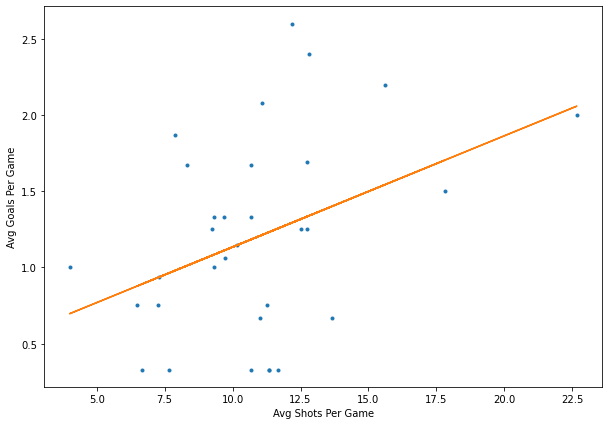

In [8]:
#creates two arrays with the data being plotted to represent x and y
x = np.array(merged_data['shots_per90'])
y = np.array(merged_data['goals_per90'])
plt.figure(figsize=(10,7))
#plots the data points
plt.plot(x, y, '.')
#determines the slope and y-intercept
m, b = np.polyfit(x, y, 1)
#creates the line of best fit
plt.plot(x, m*x+b)
#prints the axis
plt.xlabel("Avg Shots Per Game")
plt.ylabel("Avg Goals Per Game")
#prints the slope value
print("Slope is: ",m)
#calculates the r-value
r = np.corrcoef(x, y)
#prints the r-value
print("R-value is: ", r[0,1])

Slope is:  0.250185510471671
R-value is:  0.5988560797363265


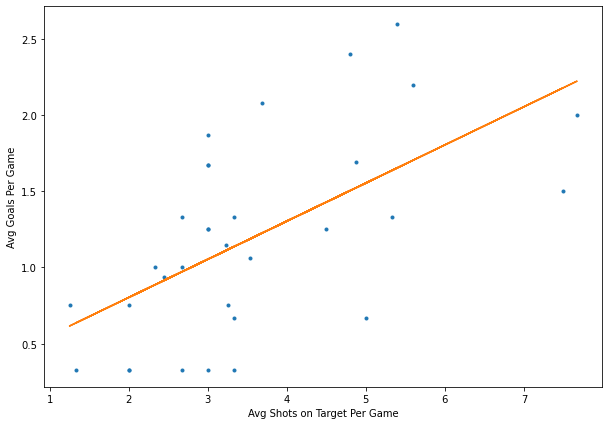

In [9]:
#creates two arrays with the data being plotted to represent x and y
x = np.array(merged_data['shots_on_target_per90'])
y = np.array(merged_data['goals_per90'])
plt.figure(figsize=(10,7))
#plots the data points
plt.plot(x, y, '.')
#determines the slope and y-intercept
m, b = np.polyfit(x, y, 1)
#creates the line of best fit
plt.plot(x, m*x+b)
#prints the axis
plt.xlabel("Avg Shots on Target Per Game")
plt.ylabel("Avg Goals Per Game")
print("Slope is: ",m)
#calculates the r-value
r = np.corrcoef(x, y)
#prints the r-value
print("R-value is: ", r[0,1])

Slope is:  0.09348800351772392
R-value is:  0.27194615594598665


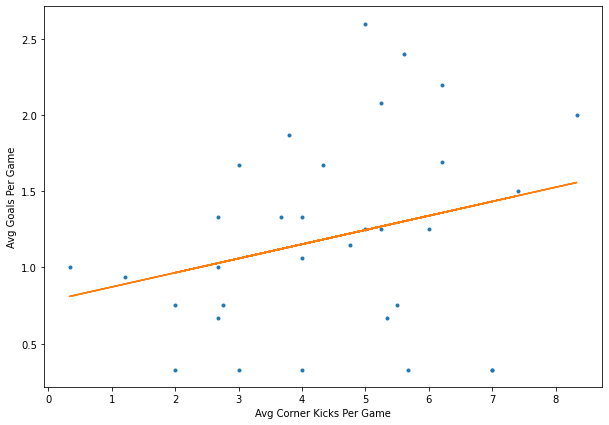

In [10]:
#creates two arrays with the data being plotted to represent x and y
x = np.array(merged_data['corner_kicks_per90'])
y = np.array(merged_data['goals_per90'])
plt.figure(figsize=(10,7))
#plots the data points
plt.plot(x, y, '.')
#determines the slope and y-intercept
m, b = np.polyfit(x, y, 1)
#creates the line of best fit
plt.plot(x, m*x+b)
#prints the axis
plt.xlabel("Avg Corner Kicks Per Game")
plt.ylabel("Avg Goals Per Game")
print("Slope is: ",m)
#calculates the r-value
r = np.corrcoef(x, y)
print("R-value is: ", r[0,1])

Slope is:  0.022949656160897957
R-value is:  0.08344618347975097


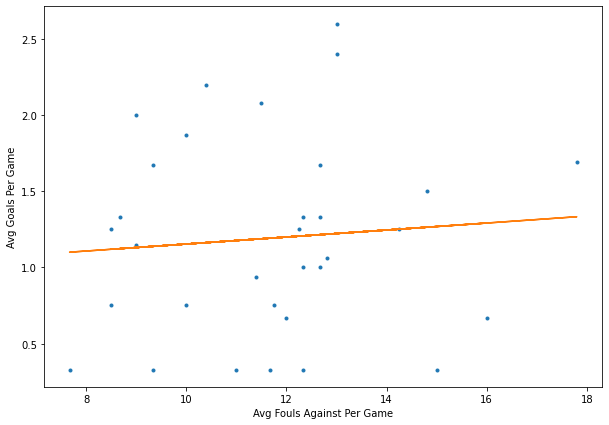

In [11]:
#creates two arrays with the data being plotted to represent x and y
x = np.array(merged_data['fouled_per90'])
y = np.array(merged_data['goals_per90'])
plt.figure(figsize=(10,7))
#plots the data points
plt.plot(x, y, '.')
#determines the slope and y-intercept
m, b = np.polyfit(x, y, 1)
#creates the line of best fit
plt.plot(x, m*x+b)
#prints the axis
plt.xlabel("Avg Fouls Against Per Game")
plt.ylabel("Avg Goals Per Game")
print("Slope is: ",m)
#calculates the r-value
r = np.corrcoef(x, y)
print("R-value is: ", r[0,1])

### Relationship Between Game Statistics and Goal Scoring Observations
After observing the relationship with the four different game statistics and goal scoring. We can visualize the relationship through the scatter plot, its strength through the line of best fit and slope, and the correlation based upon the r-value.  
- Avg Shots Per Game  
    Based upon the slope of the graph we can see the positive relationship between the avg shots per game and the number of goals scored, the more you shoot the more you will score. The slope is 0.07. The r-value is 0.3949 also meaning there is a positive correlation. However the correlation is low according to the r-value. And is visually weak when looking at the data points scattered throughout the plot.
- Avg Shots on Target Per Game
    Based upon the slope of the graph we can see the positive relationship between the avg shots on target per game and the number of goals scored, the more you shoot on target the more you will score. The slope is 0.25. The r-value is 0.5988 also meaning there is a positive correlation. The correlation is moderate according to the r-value. And is visually moderate wehn looking at the data points scattered throughout the plot, however the trend is definitely more visible.
- Avg Number of Corner Kicks Per Game
    Based upon the slope of the graph we can see the slight positive realtionship between the avg number of corner kicks per game and the number of goals scored. The more corners a team has the more opportunity they have to score a goal, so thats why we see a slight positive relationship between the number of corners taken and the number of goals scored. The slope is 0.09. The r-value is 0.2719 also meaning there is a very minimal positive correlation, but we do see the positive trend visually in the scatter plot.
- Avg Number of Fouls Against Per Game
    Based upon the slope of this graph we can see the very slight positive relationship between the avg number fouls on the team per game and the number of goals scored. The relationship is so slight that the line of best fit is almost completely horizontal. The slope is 0.02. This almost non-existent relationship is affirmed by the r-value which is 0.083, it is so close to zero that it proves there is almost no relationship between the two. This means that just because there were more fouls on the team, and therefore advantages given, it does not provide a greater chance of a goal being scored.
    
After analyzing all of these relationships, it is evident that the number of shots on target per game is the statistic with the greatest relationship to the number of goals being scored. We will keep this in mind when we analyze the data further later on.


### Determining The Relationship Between Game Statistics and Goal Scoring Against
In order to see what game statistics have a relationship with goals scored against, I picked out 3 game statistics that are unfavorable towards the team. In this case we are analyzing:  
- Average Shots On Target Against Per Game
- Average Shots Blocked Per Game
- Average Number of Fouls Per Game

I chose to include all of these game statistics, because each are all negative to the team and are related to a goal scored against or provide an opportunity for the other team to score a goal. Each category is compared with the Average Number of Goals Scored Against Per Game in order to determine the relationship and correlation between the two variables. Below for each different game statistic, we create a scatter plot to show the plotted data, a line of best fit to show the calculated slope and relationship, along with the r-value to show the correlation. We are looking to find a relationship with the highest correlation to determine which statistic is most closely related to goal scoring. 

Slope is:  0.32953736984645715
R-value is:  0.7188523992365627


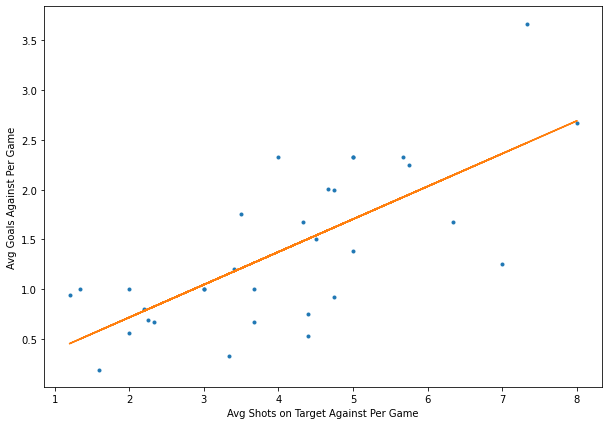

In [12]:
#creates two arrays with the data being plotted to represent x and y
x = np.array(merged_data['gk_shots_on_target_against_per90'])
y = np.array(merged_data['gk_goals_against_per90'])
plt.figure(figsize=(10,7))
#plots the data points
plt.plot(x, y, '.')
#determines the slope and y-intercept
m, b = np.polyfit(x, y, 1)
#creates the line of best fit
plt.plot(x, m*x+b)
#prints the axis
plt.xlabel("Avg Shots on Target Against Per Game")
plt.ylabel("Avg Goals Against Per Game")
print("Slope is: ",m)
#calculates the r-value
r = np.corrcoef(x, y)
print("R-value is: ", r[0,1])

Slope is:  0.0991945734675361
R-value is:  0.1686504490714393


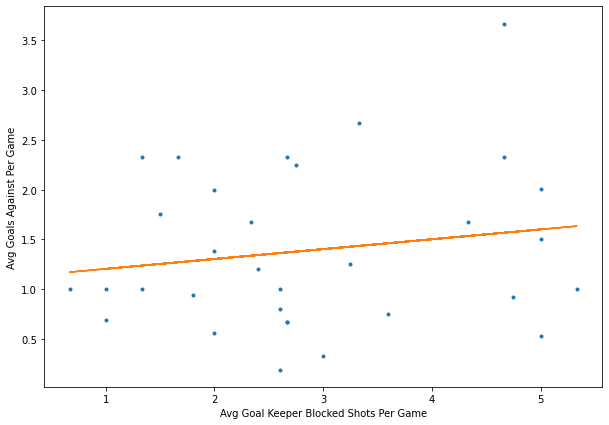

In [13]:
#creates two arrays with the data being plotted
x = np.array(merged_data['blocked_shots_per90'])
y = np.array(merged_data['gk_goals_against_per90'])
plt.figure(figsize=(10,7))
#plots the data points
plt.plot(x, y, '.')
#determines the slope and y-intercept
m, b = np.polyfit(x, y, 1)
#creates the line of best fit
plt.plot(x, m*x+b)
#prints the axis
plt.xlabel("Avg Goal Keeper Blocked Shots Per Game")
plt.ylabel("Avg Goals Against Per Game")
print("Slope is: ",m)
#calculates the r-value
r = np.corrcoef(x, y)
print("R-value is: ", r[0,1])

Slope is:  -0.050613703787157245
R-value is:  -0.1707868515295538


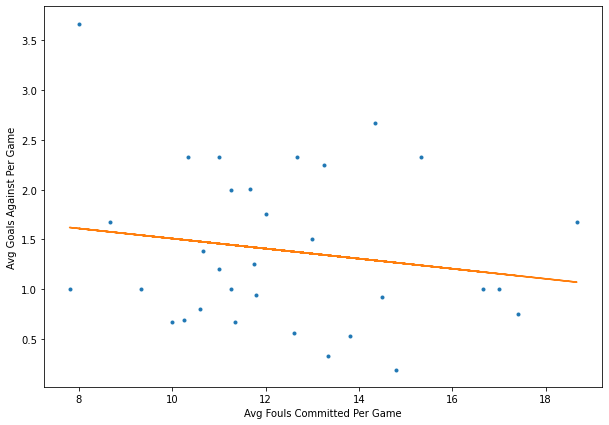

In [14]:
#creates two arrays with the data being plotted
x = np.array(merged_data['fouls_per90'])
y = np.array(merged_data['gk_goals_against_per90'])
plt.figure(figsize=(10,7))
#plots the data points
plt.plot(x, y, '.')
#determines the slope and y-intercept
m, b = np.polyfit(x, y, 1)
#creates the line of best fit
plt.plot(x, m*x+b)
#prints the axis
plt.xlabel("Avg Fouls Committed Per Game")
plt.ylabel("Avg Goals Against Per Game")
print("Slope is: ",m)
#calculates the r-value
r = np.corrcoef(x, y)
print("R-value is: ", r[0,1])

### Relationship Between Game Statistics and Goal Scoring Against Observations
After observing the relationship with the three different negative game statistics and goal scoring against. We can visualize the relationship through the scatter plot, its strength through the line of best fit and slope, and the correlation based upon the r-value. 
- Average Shots On Target Against Per Game
     Based upon the slope of the graph we can see the positive relationship between the avg shots on target against per game and the number of goals scored, the more a team shoots on you the more they will score. This is the same as what we analyzed before with the average shots on target and the goals scored, but this graph focuses on the other team and the goalie. The slope is 0.33. The r-value is 0.7188 also meaning there is a strong positive correlation. When looking at the graph we can see this upward trend of the data and strong relationship.  
- Average Shots Blocked Per Game
    Based on the slope of the graph we can see the very slight positive relationship, the slope value is 0.099, and the line of best fit is almost horizontal. Meaning there is almost a non-exist relationship between the average number of shots a goal keeper blocks. This makes sense because with the number of shots a goal keeper blocks, we would not want to see the number of goals scored against them increase. The r-value is 0.1686 also confirming the minimal correlation between. the data.
- Average Number of Fouls Per Game
    Initially when looking at the data points there looks like there is no relationship. When plotting the line of best fit and calculating the slope and r-value, (slope=-0.05, r-value=-0.1707), we actually see that there is a slight negative relationship. Meaning that as the number of fouls the team committs, it actually lessens the opposing teams number of goals. This was shocking because committing a foul will give the other team an advantage, so you would expect them to be able to score more off of this, but it actually has a negative relationship and correlation.
    
After analyzing all of these relationships, it is evident that the number of shots on target against per game is the statistic with the greatest relationship to the number of goals against being scored. We will keep this in mind when we analyze the data further later on.

### Calculating and Displaying Accuracy Percentages Among The Teams
Now that we have determined the greatest relationship between data statistics and goal scoring and saving is that the more shots on target the more goals scored and the more shots on target against the more goals scored against. We are going to analyze the goal scoring accuracy and the goal saving accuracy for each team.  
Goal Saving Percentage has already been calculated as the (Shots on Target Against - Goals Against)/Shots on Target Against)x100 so this will show us the goal keepers saving accuracy. Goal Scoring Percentage has not been calculated for us, so we will calculate that the same as Goal Saving Percentage was calculated, (Shots on Target - Goals)/(Shots on Target)x100 and this will show us the goal scoring accuracy.  
We will add this data to the dataframe and then display it in the form of a bar graph.  
It is important to note that this data is only up to date with the group stages, so when analyzing the data in the will differentiate the groups eliminated and the groups not eliminated with different colors in the graph. Also will display the different accuracy percentage averages if it is not clear which group has the more favorable statistics.

In [15]:
#creates an array for the goal scoring percentage that we will calculate and add to the dataframe
goals_scored_pct = []

#goes through each row in the dataframe
for i, row in team_data.iterrows(): 
    #calculates the goal scoring percentage for the shots on target and the goals and adds to the array
    goals_scored_pct.append(((row['shots_on_target'] - row['goals']) / (row['shots_on_target']))*100)
#adds array to the dataframe
merged_data['goals_scored_pct'] = goals_scored_pct
merged_data

,Unnamed: 0,group,rank,team,matches_played,wins,draws,losses,goals_scored,goals_against,...,gk_save_pct,gk_goals_against_per90,shots_per90,shots_on_target_per90,gk_shots_on_target_against_per90,corner_kicks_per90,blocked_shots_per90,fouls_per90,fouled_per90,goals_scored_pct
0,0,1,1,Netherlands,3,2,1,0,5,1,...,86.4,0.75,7.88,3.00,4.400000,3.800000,3.600000,17.400000,10.000000,65.384615
1,1,1,2,Senegal,3,2,0,1,5,4,...,50.0,1.75,12.75,3.00,3.500000,5.250000,1.500000,12.000000,14.250000,62.500000
2,2,1,3,Ecuador,3,1,1,1,4,3,...,50.0,1.00,9.67,3.33,1.333333,3.666667,1.333333,16.666667,12.333333,88.888889
3,3,1,4,Qatar,3,0,0,3,1,7,...,50.0,2.33,6.67,2.00,4.000000,3.000000,1.333333,10.333333,15.000000,80.000000
4,4,2,1,England,3,2,1,0,9,2,...,72.7,0.80,12.20,5.40,2.200000,5.000000,2.600000,10.600000,13.000000,75.000000
5,5,2,2,United States,3,1,2,0,2,1,...,75.0,1.00,11.25,3.25,3.000000,5.500000,1.000000,11.250000,10.000000,75.000000
6,6,2,3,Iran,3,1,0,2,4,7,...,53.3,2.33,10.67,2.67,5.000000,2.666667,2.666667,12.666667,8.666667,57.142857
7,7,2,4,Wales,3,0,1,2,1,6,...,57.1,2.01,7.67,2.00,4.666667,2.000000,5.000000,11.666667,11.000000,70.000000
8,8,3,1,Argentina,3,2,0,1,5,2,...,16.7,0.94,12.75,4.87,1.200000,6.200000,1.800000,11.800000,17.800000,90.000000
9,9,3,2,Poland,3,1,1,1,2,2,...,82.1,1.25,7.25,1.25,7.000000,2.750000,3.250000,11.750000,11.750000,60.000000


The Average Goal Scoring Percentage among the teams eliminated:  64.57325371387871
The Average Goal Scoring Percentage among the teams not yet eliminated:  66.39574043106651


Text(0, 0.5, 'Goals Scoring Percentage')

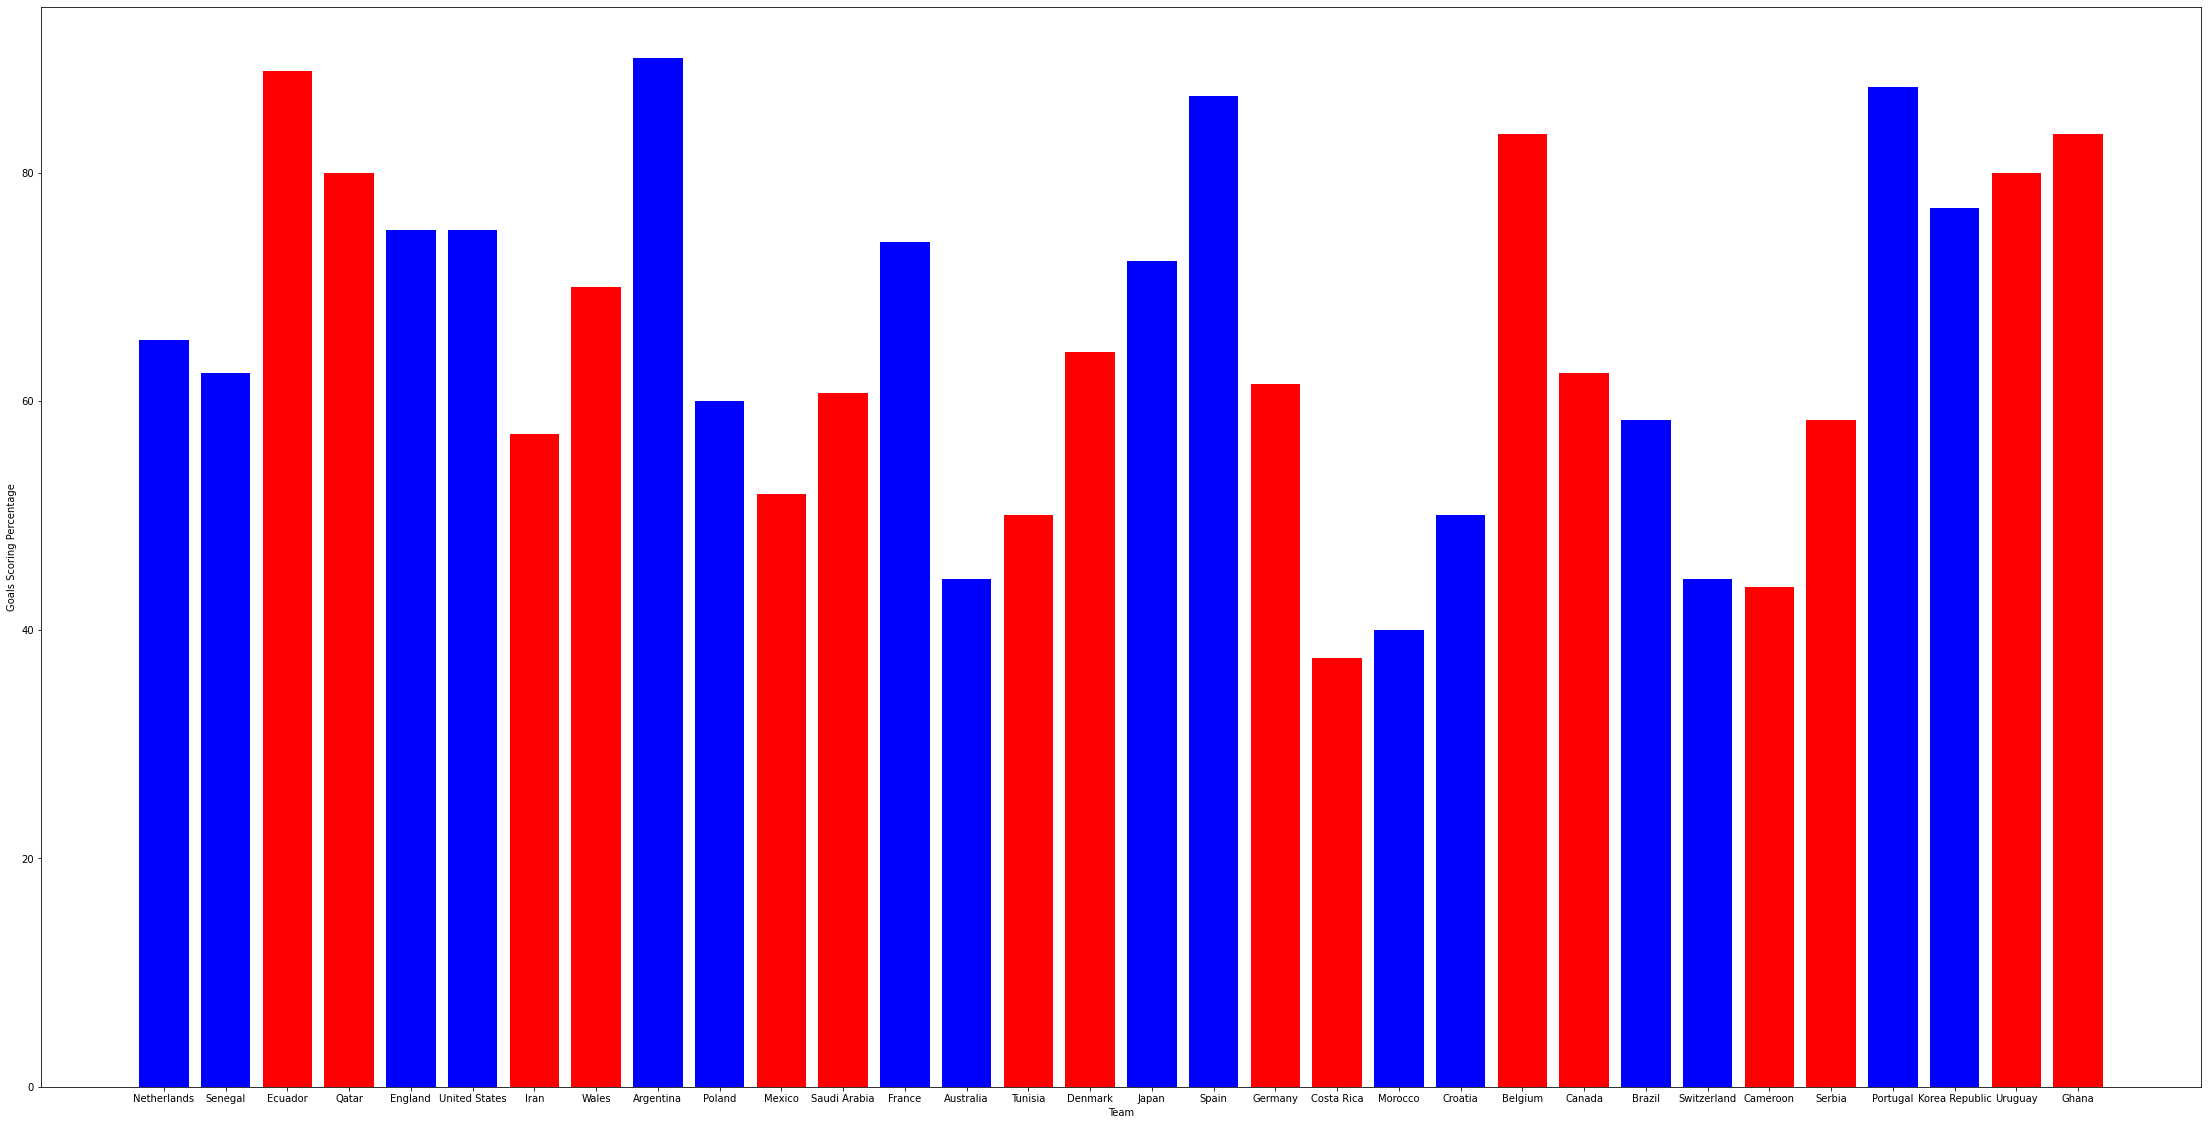

In [16]:
#creates two arrays with the data being plotted
x = np.array(merged_data['team'])
y = np.array(merged_data['goals_scored_pct'])

#creates integers that will calculate the scoring accuracy for the teams that have been elimnated and the teams that are still in the tournament
eliminated_avg = 0
not_eliminated_avg = 0

#creates a color array that will store colors assign a data point a color based upon whether the team was eliminated or not
colors = []
#goes through the rows of the dataframe
for i, row in merged_data.iterrows():
    #if the rank is 3 or 4 it means they were eliminated from the group stages and will therefore be assigned red
    #also adds the goal_scored_pct to calculate a total for the elimated teams
    if row['rank'] == 3:
        colors.append('r')
        eliminated_avg += row['goals_scored_pct']
    elif row['rank'] == 4:
        colors.append('r')
        eliminated_avg += row['goals_scored_pct']
    else:
        #if the rank is not 3 or 4 it means the team was not elimnated from the group stages and will be assigned blue
        #also adds the goal_scored_pct to calculate a total for the not elimated teams
        colors.append('b')
        not_eliminated_avg += row['goals_scored_pct']

#there are 16 teams in each group, so divide each integer by 16 to get the average
eliminated_avg = eliminated_avg/16
not_eliminated_avg = not_eliminated_avg/16

#prints the averages
print("The Average Goal Scoring Percentage among the teams eliminated: ", eliminated_avg)
print("The Average Goal Scoring Percentage among the teams not yet eliminated: ", not_eliminated_avg)

#creates a bar plot
fig = plt.figure(figsize=(30,15))
ax = fig.add_axes([0,0,1,1])
#plots data and assigns color based on whether team was eliminated or not
ax.bar(x, y, color=colors)
#prints axis
plt.xlabel("Team")
plt.ylabel("Goals Scoring Percentage")

This graph shows each team and their goal scoring percentage accuracy. The teams in the red are teams that have been eliminated, the teams in blue are teams that have not yet been eliminated. Because there are so many teams and many varying accuracy percentages the graph can be hard to determine the clear side that is more accurate. It is evident that the not eliminated teams have some of the highest goal scoring accuracies. By printing out the average for the eliminated and the not eliminated, we can see that in total the teams eliminated have a lower scoring accuracy (64.5733) while the teams not yet eliminated have a slightly scoring accuracy (66.3957)

The Average Goal Keeper Save Percentage among the teams eliminated:  65.21875
The Average Goal Keeper Save Percentage among the teams not yet eliminated:  69.575


Text(0, 0.5, 'Goal Keeper Save Percentage')

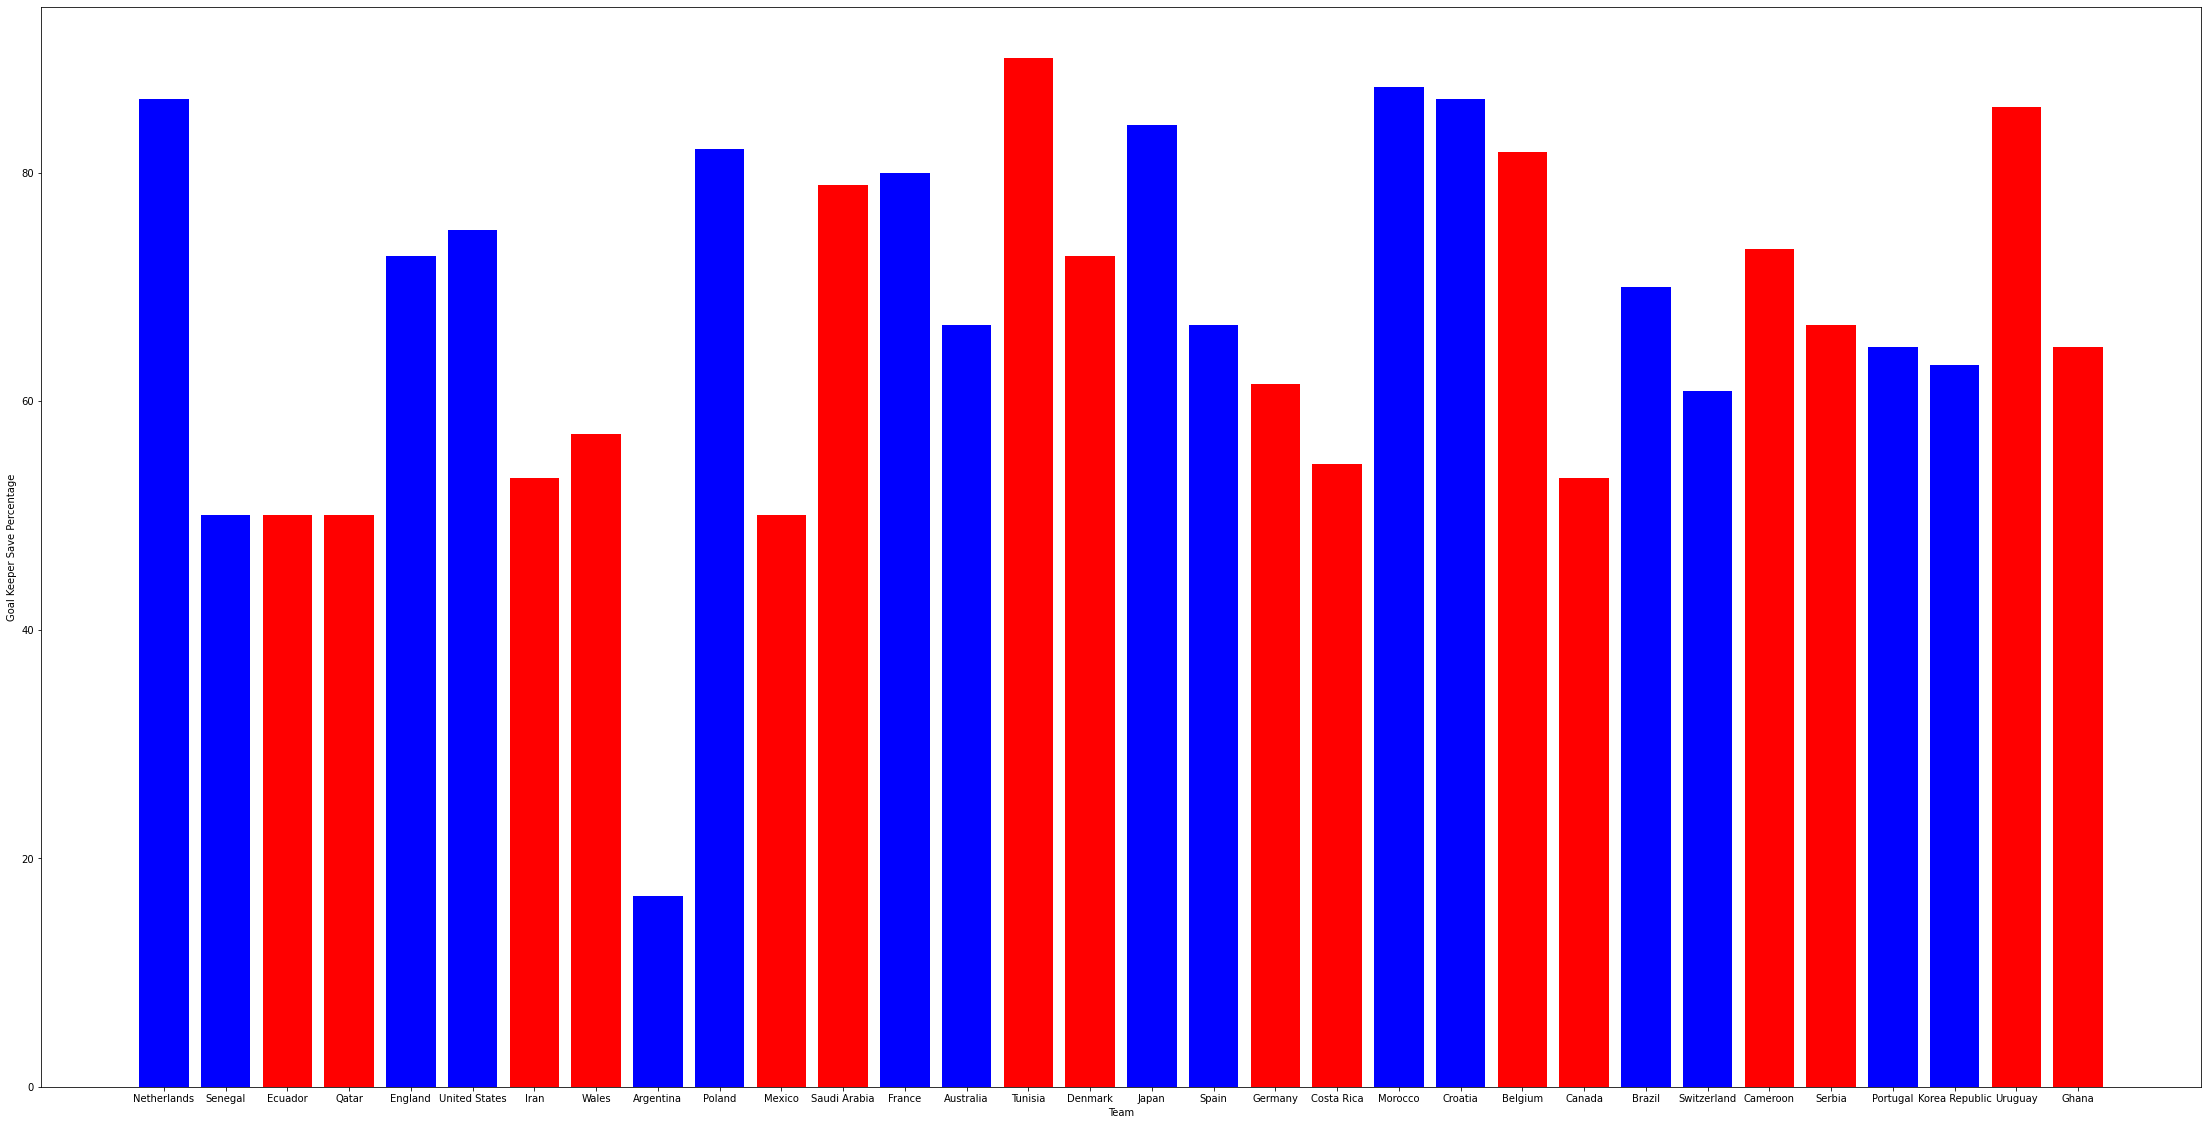

In [17]:
#creates two arrays with the data being plotted
x = np.array(merged_data['team'])
y = np.array(merged_data['gk_save_pct'])

#creates integers that will calculate the scoring accuracy for the teams that have been elimnated and the teams that are still in the tournament
eliminated_avg = 0
not_eliminated_avg = 0

colors = []
#goes through the rows of the dataframe
for i, row in merged_data.iterrows(): 
    #if the rank is 3 or 4 it means they were eliminated from the group stages and will therefore be assigned red
    #also adds the goal_scored_pct to calculate a total for the elimated teams
    if row['rank'] == 3:
        colors.append('r')
        eliminated_avg += row['gk_save_pct']
    elif row['rank'] == 4:
        colors.append('r')
        eliminated_avg += row['gk_save_pct']
    else:
        #if the rank is not 3 or 4 it means the team was not elimnated from the group stages and will be assigned blue
        #also adds the goal_scored_pct to calculate a total for the not elimated teams
        colors.append('b')
        not_eliminated_avg += row['gk_save_pct']
        
#there are 16 teams in each group, so divide each integer by 16 to get the average
eliminated_avg = eliminated_avg/16
not_eliminated_avg = not_eliminated_avg/16

#prints the averages
print("The Average Goal Keeper Save Percentage among the teams eliminated: ", eliminated_avg)
print("The Average Goal Keeper Save Percentage among the teams not yet eliminated: ", not_eliminated_avg)

#creates a bar plot
fig = plt.figure(figsize=(30,15))
ax = fig.add_axes([0,0,1,1])
#plots data and assigns color based on whether team was eliminated or not
ax.bar(x, y, color=colors)
#prints axis
plt.xlabel("Team")
plt.ylabel("Goal Keeper Save Percentage")

This graph shows each team and their goal saving percentage accuracy. The teams in the red are teams that have been eliminated, the teams in blue are teams that have not yet been eliminated. Because there are so many teams and many varying accuracy percentages the graph can be hard to determine the clear side that is more accurate. It is evident that the not eliminated teams have some of the highest goal scoring accuracies. By printing out the average for the eliminated and the not eliminated, we can see that in total the teams eliminated have a lower goal saving accuracy (65.21875) while the teams not yet eliminated have a higher goal saving accuracy (69.575)  

### Overall Performance Accuracy
In both scenarios above, goal scoring accuracy and goal saving accuracy, the teams not yet eliminated have a higher average accuracy. So now to add these two variables together and divide by 2 in order to get the overall performance accuracy based on goal scoring and saving we can see this overall performance accuracy compared to the teams eliminated and not yet eliminated like how we did above.

In [18]:
#In both scenarios the teams that have not yet been eliminated have a higher accuracy percentage

In [19]:
#creates an array for the goal scoring percentage that we will calculate and add to the dataframe
performance_accuracy_pct = []
#goes through each row in the dataframe
for i, row in merged_data.iterrows():
    #adds the goal_scored_pct and gk_save_pct and divides by two to combine the two greatest accuracy percentages to create a total performance accuracy percentage
    performance_accuracy_pct.append((row['goals_scored_pct'] + row['gk_save_pct']) / 2)
#adds the array to the dataframe
merged_data['performance_accuracy_pct'] = performance_accuracy_pct

The Performance Accuracy Percentage among the teams eliminated:  64.89600185693935
The Performance Accuracy Percentage among the teams not yet eliminated:  67.98537021553327


Text(0, 0.5, 'Performance Accuracy Percentage')

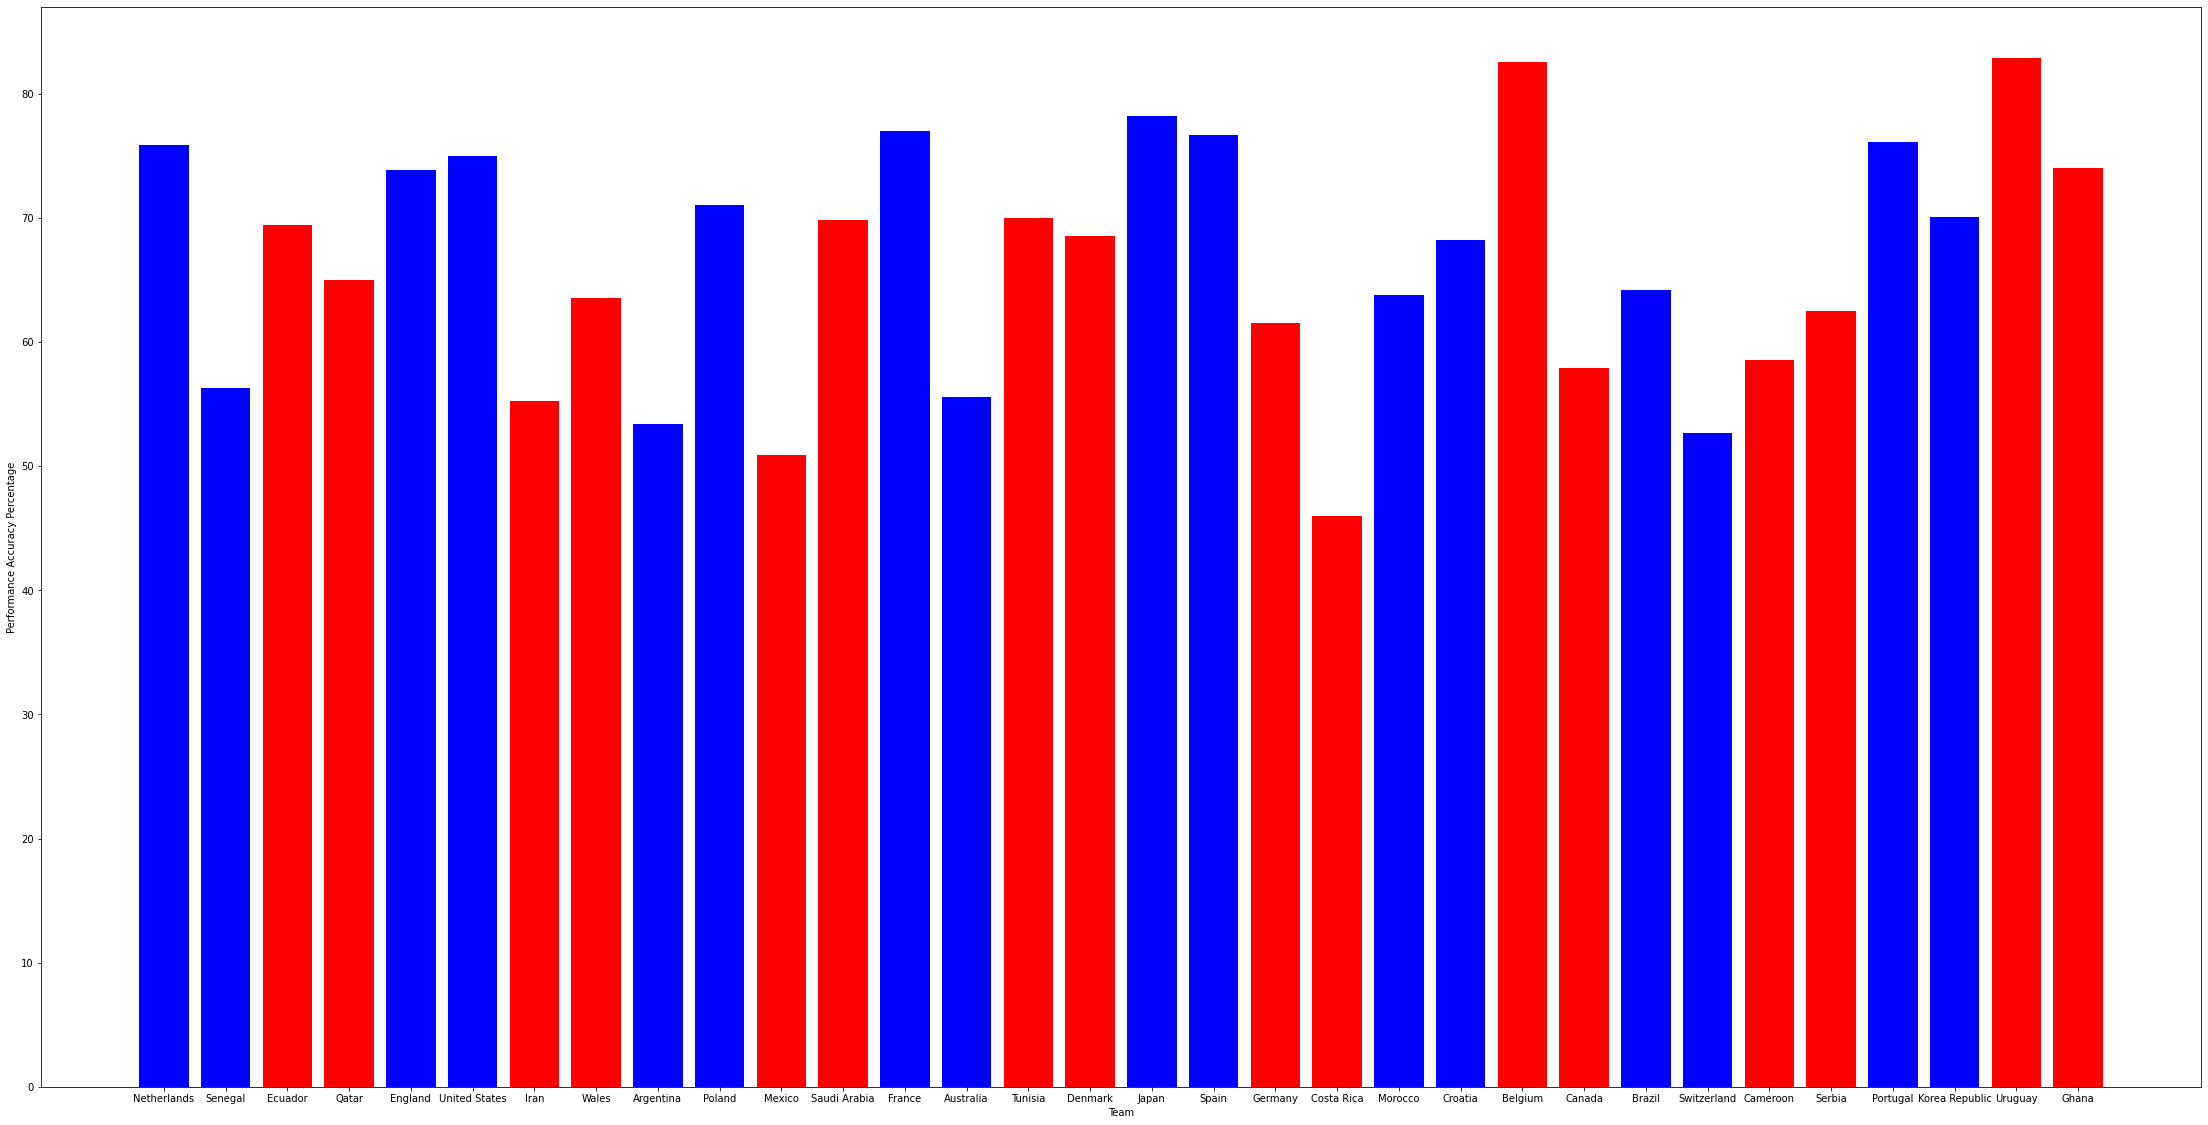

In [20]:
x = np.array(merged_data['team'])
y = np.array(merged_data['performance_accuracy_pct'])

eliminated_avg = 0
not_eliminated_avg = 0

colors = []
#goes through the rows of the dataframe
for i, row in merged_data.iterrows(): 
    #if the rank is 3 or 4 it means they were eliminated from the group stages and will therefore be assigned red
    #also adds the goal_scored_pct to calculate a total for the elimated teams
    if row['rank'] == 3:
        colors.append('r')
        eliminated_avg += row['performance_accuracy_pct']
    elif row['rank'] == 4:
        colors.append('r')
        eliminated_avg += row['performance_accuracy_pct']
    else:
        #if the rank is not 3 or 4 it means the team was not elimnated from the group stages and will be assigned blue
        #also adds the goal_scored_pct to calculate a total for the not elimated teams
        colors.append('b')
        not_eliminated_avg += row['performance_accuracy_pct']
        
#there are 16 teams in each group, so divide each integer by 16 to get the average
eliminated_avg = eliminated_avg/16
not_eliminated_avg = not_eliminated_avg/16

#prints the averages
print("The Performance Accuracy Percentage among the teams eliminated: ", eliminated_avg)
print("The Performance Accuracy Percentage among the teams not yet eliminated: ", not_eliminated_avg)


fig = plt.figure(figsize=(30,15))
ax = fig.add_axes([0,0,1,1])
ax.bar(x, y, color=colors)
plt.xlabel("Team")
plt.ylabel("Performance Accuracy Percentage")

This performance accuracy percentage for each team graphed, affirms the graphs above. The red is the teams eliminated and the blue is the teams not yet eliminated. By printing out the averages we see that the teams eliminated have an average performance accuracy of 64.896 and the teams not yet eliminated have an average performance accuracy of 67.985. This is around 3 percentage points better, proving that the teams still in the tournament are marginally more accurate, but on average still more accurate than the teams eliminated in the tournament.

### Applying Findings to Current Standings
Now that I am doing this project on the 8th of December and we are about to be at the quarter finals of the World Cup. I am going to remove the teams that have been eliminated from the group stages. I am also going to color coordinate the graph to show teams eliminated in each round from the round of 16. And display the performance accuracy for the 16 teams, and determine who should win based on the teams in the quarter-finals.

In [21]:
#goes through range(1,9) because there are 8 groups in the group stages
for x in range(1,9):
    #goes through all of the groups and eliminates teams ranked 3 and 4, meaning they have been eliminated from the tournament
    for index, team in merged_data[merged_data['group'] == x].iterrows():
        merged_data.drop(merged_data[ (merged_data['rank'] == 3) | (merged_data['rank'] == 4)].index, inplace=True)       
merged_data

,Unnamed: 0,group,rank,team,matches_played,wins,draws,losses,goals_scored,goals_against,...,gk_goals_against_per90,shots_per90,shots_on_target_per90,gk_shots_on_target_against_per90,corner_kicks_per90,blocked_shots_per90,fouls_per90,fouled_per90,goals_scored_pct,performance_accuracy_pct
0,0,1,1,Netherlands,3,2,1,0,5,1,...,0.75,7.88,3.00,4.40,3.80,3.60,17.40,10.00,65.384615,75.892308
1,1,1,2,Senegal,3,2,0,1,5,4,...,1.75,12.75,3.00,3.50,5.25,1.50,12.00,14.25,62.500000,56.250000
4,4,2,1,England,3,2,1,0,9,2,...,0.80,12.20,5.40,2.20,5.00,2.60,10.60,13.00,75.000000,73.850000
5,5,2,2,United States,3,1,2,0,2,1,...,1.00,11.25,3.25,3.00,5.50,1.00,11.25,10.00,75.000000,75.000000
8,8,3,1,Argentina,3,2,0,1,5,2,...,0.94,12.75,4.87,1.20,6.20,1.80,11.80,17.80,90.000000,53.350000
9,9,3,2,Poland,3,1,1,1,2,2,...,1.25,7.25,1.25,7.00,2.75,3.25,11.75,11.75,60.000000,71.050000
12,12,4,1,France,3,2,0,1,6,3,...,1.00,15.60,5.60,3.00,6.20,2.60,7.80,10.40,73.913043,76.956522
13,13,4,2,Australia,3,2,0,1,3,4,...,1.50,6.50,2.00,4.50,2.00,5.00,13.00,8.50,44.444444,55.572222
16,16,5,1,Japan,3,2,0,1,4,3,...,0.92,10.15,3.23,4.75,4.75,4.75,14.50,9.00,72.222222,78.211111
17,17,5,2,Spain,3,1,1,1,9,3,...,0.69,11.08,3.69,2.25,5.25,1.00,10.25,11.50,86.666667,76.683333


The Performance Accuracy Percentage among the teams eliminated in the round of 16:  66.93755341880342
The Performance Accuracy Percentage among the teams not yet eliminated:  69.0331870122631


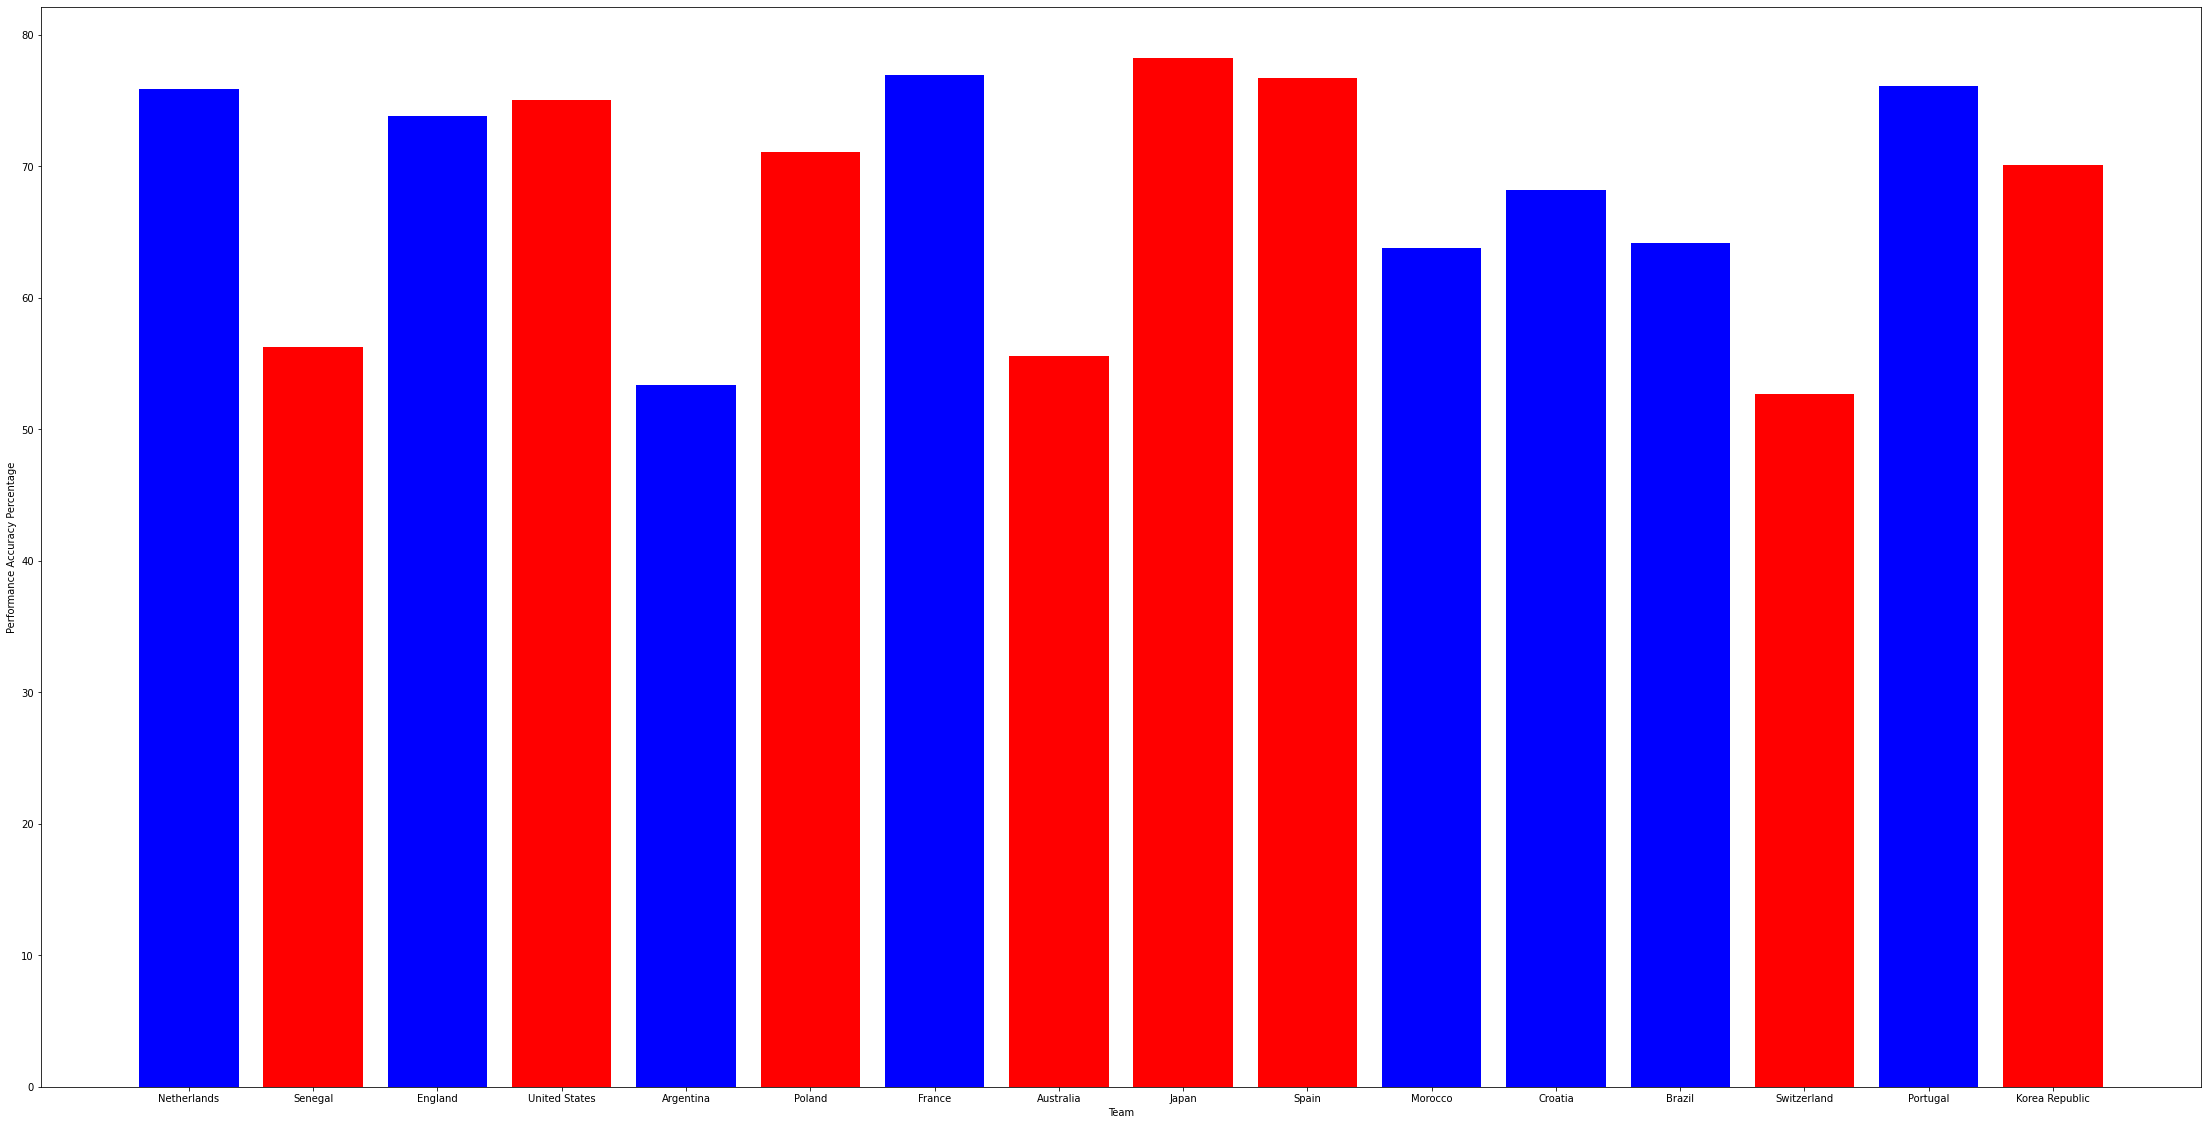

In [22]:
x = np.array(merged_data['team'])
y = np.array(merged_data['performance_accuracy_pct'])
#based on the ordering of the teams this assigns colors to them to differentiate what stage they were eliminated in
colors = ['b', 'r', 'b', 'r', 'b', 'r', 'b', 'r', 'r', 'r', 'b', 'b', 'b', 'r', 'b', 'r']
merged_data['color'] = colors
fig = plt.figure(figsize=(30,15))
ax = fig.add_axes([0,0,1,1])
#creates the bar plot
ax.bar(x, y, color=colors)
#adds axis
plt.xlabel("Team")
plt.ylabel("Performance Accuracy Percentage")

round16_eliminated_avg = 0
not_eliminated_avg = 0

#goes through the rows of the dataframe
for i, row in merged_data.iterrows(): 
    if row['color'] == 'r':
        round16_eliminated_avg += row['performance_accuracy_pct']
    else:
        not_eliminated_avg += row['performance_accuracy_pct']
        
round16_eliminated_avg = round16_eliminated_avg/8
not_eliminated_avg = not_eliminated_avg/8
    
print("The Performance Accuracy Percentage among the teams eliminated in the round of 16: ", round16_eliminated_avg)
print("The Performance Accuracy Percentage among the teams not yet eliminated: ", not_eliminated_avg)

The teams in the red were elimnated in the round of 16 and the teams in the blue are the teams that are still in the tournament in the quarter-finals. The performance accuracy for each group is also printed. The average has also been calculated for the teams eliminated and the teams left over and there is around 2% difference in their accuracy, meaning that the teams left over are still on average more accurate.

## Part 4: Conclusion
Now that we have calculated the overall performance accuracy for each team and shown how the average performance accuracy is greater for the teams remaining in the tournament versus the teams that are eliminated after each round. Based off of all of this data, in order to accurately determine which team should win the world cup, we will find the team with the highest overall performance accuracy of the teams leftover. 

In [23]:
merged_data.drop(merged_data.loc[ (merged_data['color'] == 'r')].index, inplace=True)
merged_data['performance_accuracy_pct'].max()

76.95652173913044

The country with this corresponding performance accuracy percentage is France. So therefore based off of all the data collected and manipulated, and the teams leftover, France has the highest performance accuracy meaning they are most accurate in goal scoring and goal saving and because of this they should be expected to win the 2022 World Cup.  

In this tutorial we have explored how we can use data statistics to predict outcomes. We have showed how to create a dataframe to store data from multiple sources. How to determine relationships between data statistics and display this relationship. How to use these relationships to predict and confirm outcomes. We were able to do this through calculations and graph representations. Overall we determined that shots on target were most closely related to a teams goal scoring, we were able to determine a teams accuracy and display how the teams that have advanced to the next round all have a greater accuracy than the teams eliminated. In conclusion France had the highest overall performance accuracy, and to see them win the 2022 World Cup would prove this trend.